In [ ]:
%reload_ext autoreload
%autoreload 2

### Load the dataset

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

# unzip the augmented dataset and load it
data = ImageDataset('./data/aug_2')

batch_size = 40

data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=1)

def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(data.float(), dim=[0,2,3])
        channels_squared_sum += torch.mean((data.float())**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

# print(get_mean_and_std(data_loader))

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


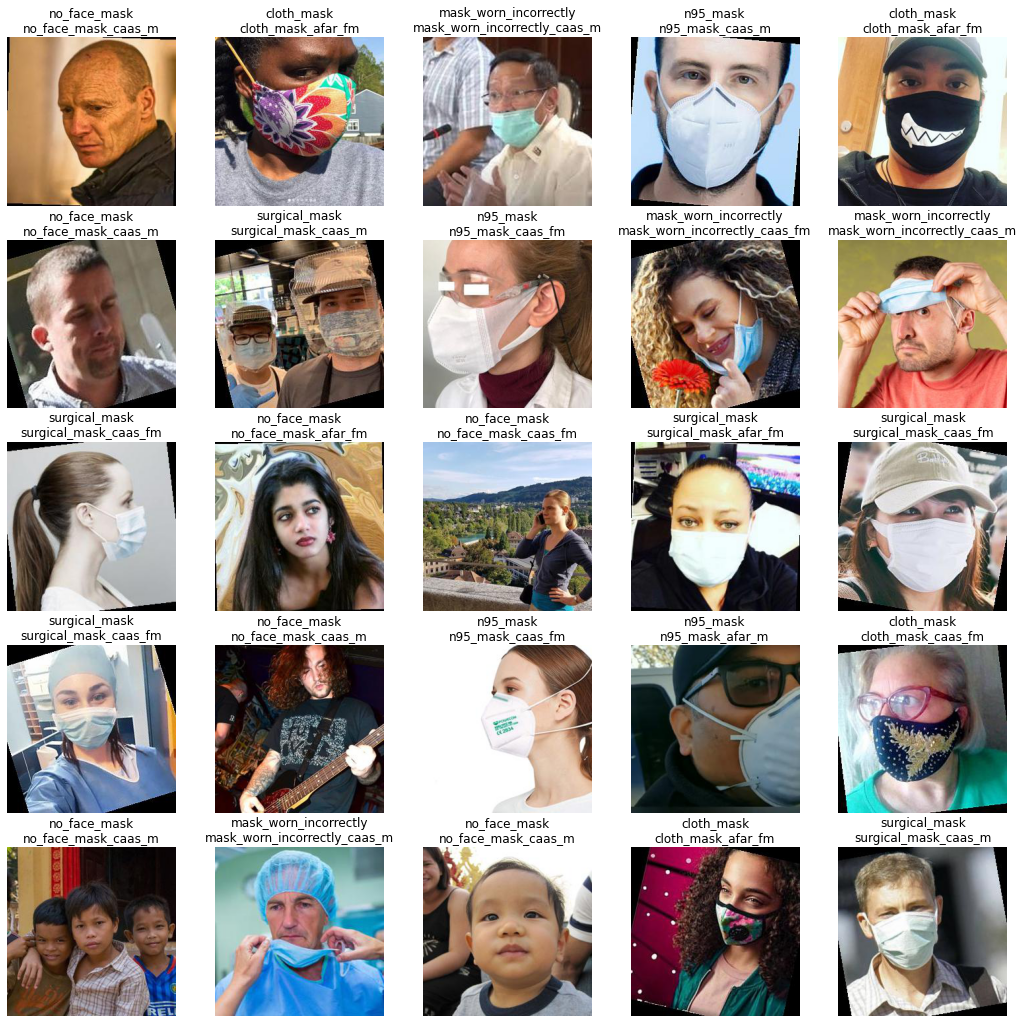

In [10]:
def show_image_rand(img_data):
    figure = plt.figure(figsize=(18, 18))
    cols, rows = 5, 5
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(img_data), size=(1,)).item()
        img, label, new_label = img_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        # plt.title(label_map[label])
        plt.title(label_map[label] + '\n' + label_map_new[new_label])
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0))
    plt.show()
    
show_image_rand(data)

### Split the dataset

In [ ]:
s1, s2 = torch.utils.data.random_split(data, [4000, 1000], generator=torch.Generator().manual_seed(0))
# s1, s2 = torch.utils.data.random_split(data, [4000, 1000], generator=torch.Generator().manual_seed(42))

def show_one(dataset, i=0):
    img, label = dataset[i]
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
    
show_one(s1)

In [ ]:
print(len(s1), len(s2))

show_image_rand(s1)

In [ ]:
s1, s2, s3, s4, s5, test_data = torch.utils.data.random_split(data, [900, 900, 900, 900, 900, 500], generator=torch.Generator().manual_seed(0))

In [ ]:
def check_label(ds):
  for d in ds:
    l_map = {}
    for item in d:
      l = item[1]
      if l_map.get(l) == None:
        l_map[l] = 0
      l_map[l] += 1
    print(l_map)
    
check_label([s1, s2, s3, s4, s5, test_data])

In [ ]:
print(len(s1), len(s2), len(s3), len(s4), len(s5), len(test_data))

show_one(s2, i=1)

In [ ]:
chain_ds = torch.utils.data.ConcatDataset((s2, s3, s4, s1, s5))

show_one(chain_ds, i=901)

In [ ]:
# unzip the augmented dataset and load it
data = ImageDataset('./data/aug_2')

l0_data = ImageDataset('./data/aug_2')
l0_data.img_labels = data.img_labels[:1000].copy()

check_label([l0_data])

l1_data = ImageDataset('./data/aug_2')
l1_data.img_labels = data.img_labels[1000:2000].copy()

check_label([l1_data])

l2_data = ImageDataset('./data/aug_2')
l2_data.img_labels = data.img_labels[2000:3000].copy()

check_label([l2_data])

l3_data = ImageDataset('./data/aug_2')
l3_data.img_labels = data.img_labels[3000:4000].copy()

check_label([l3_data])

l4_data = ImageDataset('./data/aug_2')
l4_data.img_labels = data.img_labels[4000:5000].copy()

check_label([l4_data])

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import ImageDataset
from Training import get_all_data
import sklearn

data = ImageDataset('./data/aug_2')
# model = Models.LinearNet()
# Using a batch size larger than the dataset means all data is retrieved in one loop iteration
# Stretch goal: Make this work on arbitrarily large datasets by stacking the tensors in the data_loader
data_loader = torch.utils.data.DataLoader(
    data, batch_size=10000, shuffle=False)
for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    break